# Werkzaamheden en klanten van een dorpssmid in 1907

## Source
In my family a customer registration has survived of blacksmith Harm Jan Zandhuis (1884-1938) in [Wijhe](http://www.wikidata.org/entity/Q3164650), a village in the province of Overijssel in the Netherlands. The fact that the registration starts halfway May and Zandhuis' age (22) at the time of creation (1907), suggest that it is the year he started to work on his own account. He and his descendends kept this customer registration as a souvenir, because it probably was the oldest one in a series where newer ones were thrown away.

The registration contains an index were the names of customers are alphabetically entered, with a reference to the page were the work he did for this customer was registered. On the page the date, work/product and price is notated.

TODO: Add picture

## Data
This dataset contains two tables, one with an overview of the customers (```klanten.csv```) and one with the work and product that HJ Zandhuis sold (```werkzaamheden.csv```). Based on the available data (sometimes only a familyname) I try to find more information on the customer in the population registration of the municipality of Wijhe. This is added to the first table. The second table contains the work the blacksmith has done, the date and the price in Dutch guilders (note that in 1907 prices could have half cents, so three decimals are needed). This table refers to the customer in the first table through the pagenumber ('fol').

A separate table (```termen.csv```) is constructed with the terms that were used to describe the work. It is extended with a 'broader term' to be able to combine work into categories.


## Analysis
I use python/pandas in a Jupyter Notebook to get some insight on the work of a blacksmith in a Dutch farm village, early twentieth century.

First read the data into a DataFrame.

In [1]:
import pandas as pd

df = pd.read_csv("data/werkzaamheden.csv")


## Cleaning

Add a column containing the month of the entry in the table and filter out incomplete months.

In [2]:
df['maand'] = round((df['datum'] - 19070000) / 100)
df = df[df['maand'] > 5]
df = df[df['maand'] < 13]

df = df.astype({'maand': 'int'})



## Calculating turnover per month
What is the turnover per month? Is there a big difference throughout the year?

<AxesSubplot: xlabel='maand'>

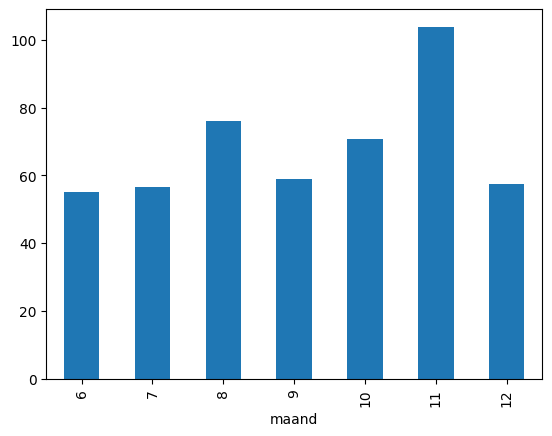

In [3]:
turnover_per_month = df.groupby('maand')['prijs'].sum()
turnover_per_month.plot(kind = 'bar')


## Calculating the mean price of a product for every month
Is the work a blacksmith does per activity changing throughout the year? 

<AxesSubplot: xlabel='maand'>

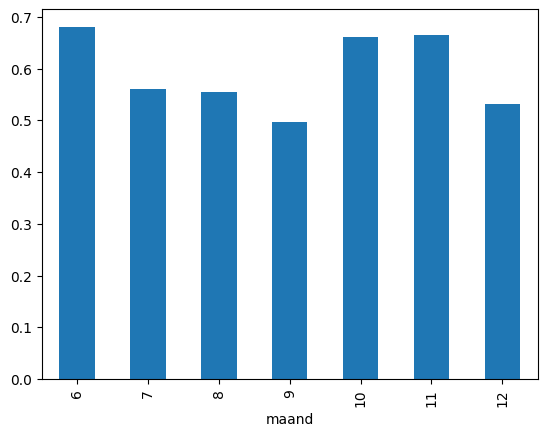

In [4]:
# TODO: remove empty prices first
mean_price_per_month = df.groupby('maand')['prijs'].mean()
mean_price_per_month.plot(kind = 'bar')

In [5]:
def get_termen(cat_BT):
    df_termen = pd.read_csv("data/termen.csv")
    cat_termen = []
    for BT in cat_BT:
        for item in df_termen[df_termen['BT'] == BT]['term'].tolist():
            cat_termen.append(item)

    return cat_termen

voertuigen_termen = get_termen(['voertuigen', 'voertuigonderdelen', 'fietsonderdelen'])
fiets_termen    = get_termen(['fietsonderdelen']) + ['fiets']

bouw_termen     = get_termen(['bouwonderdelen', 'kachelonderdelen'])
kachel_termen   = get_termen(['kachelonderdelen']) + ['kachel']

paard_termen    = get_termen(['paard', 'hoefijzers', 'hoefijzeronderdelen'])
werktuigen_termen = get_termen(['landbouwwerktuigen', 'ploegonderdelen', 'gereedschappen', 'machineonderdelen', 'huishoudelijke gereedschappen'])
ploeg_termen    = get_termen(['ploegonderdelen']) + ['ploeg']

verpakking_termen = get_termen(['verpakkingsmiddelen'])

<AxesSubplot: xlabel='categorie'>

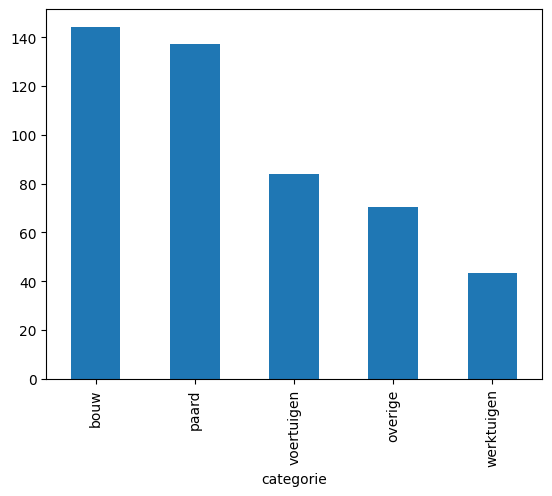

In [6]:
df['object']    = df['object'].fillna('')
df['materiaal'] = df['materiaal'].fillna('')
df['termen']    = df['object'] + " | " + df['materiaal']

df.loc[df['termen'].str.contains('|'.join(voertuigen_termen),regex=True), 'categorie'] = 'voertuigen'
df.loc[df['termen'].str.contains('|'.join(werktuigen_termen),regex=True), 'categorie'] = 'werktuigen'
df.loc[df['termen'].str.contains('|'.join(paard_termen),regex=True), 'categorie'] = 'paard'
df.loc[df['termen'].str.contains('|'.join(bouw_termen),regex=True), 'categorie'] = 'bouw'
df['categorie'] = df['categorie'].fillna('overige')

df.groupby('categorie')['prijs'].sum().sort_values(ascending=False).plot(kind = 'bar')

In [7]:
df['prijs'].sum()

478.76

In [8]:
df.groupby('categorie')['prijs'].sum().sort_values(ascending=False)

categorie
bouw          144.315
paard         137.155
voertuigen     83.755
overige        70.235
werktuigen     43.300
Name: prijs, dtype: float64

In [9]:
df_bouw = df[df['termen'].str.contains('|'.join(bouw_termen),regex=True)]
df_bouw['prijs'].sum()

144.315

<AxesSubplot: xlabel='maand'>

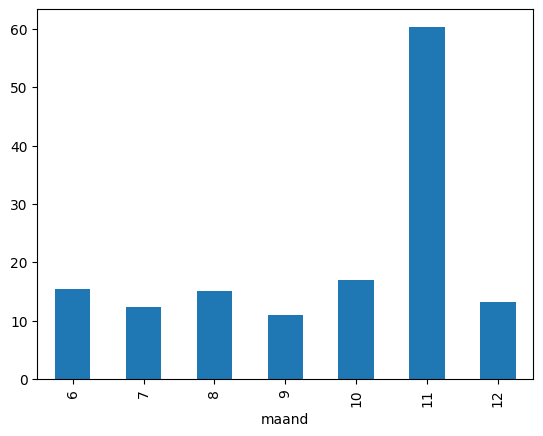

In [10]:
df_bouw.groupby('maand')['prijs'].sum().plot(kind = 'bar')

In [11]:
df_kachel = df[df['termen'].str.contains('|'.join(kachel_termen),regex=True)]
df_kachel['prijs'].sum()

58.070000000000014

<AxesSubplot: xlabel='maand'>

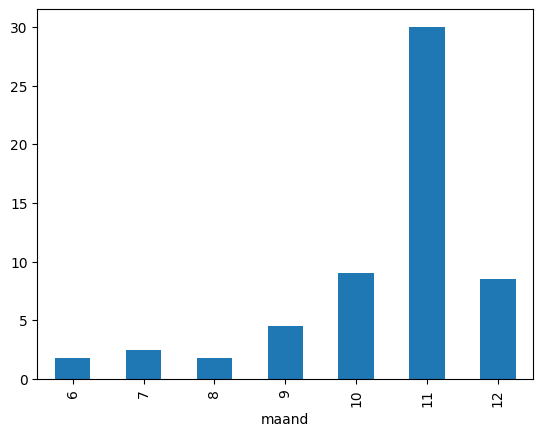

In [12]:
df_kachel.groupby('maand')['prijs'].sum().plot(kind = 'bar')

In [13]:
df_fiets = df[df['termen'].str.contains('|'.join(fiets_termen),regex=True)]
df_fiets['prijs'].sum()

38.65

<AxesSubplot: xlabel='maand'>

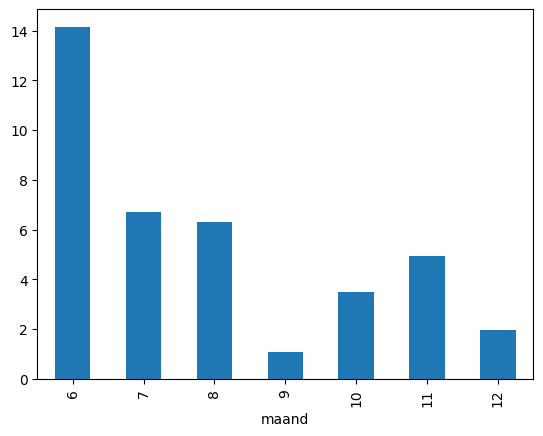

In [14]:
df_fiets.groupby('maand')['prijs'].sum().plot(kind = 'bar')

In [15]:
print(df.groupby('fol')['prijs'].sum().sort_values(ascending = False).to_string())

fol
122    27.225
5      25.010
60     20.895
3      20.870
15     15.850
7      15.650
82     13.480
23     12.630
49     12.400
1      11.800
80     10.205
93      9.170
14      8.980
48      8.125
44      8.080
78      7.950
12      7.575
53      7.050
43      7.000
73      6.920
105     6.760
74      6.760
33      6.300
11      6.235
131     6.155
26      5.900
118     5.600
108     5.025
25      4.880
107     4.745
32      4.700
76      4.650
30      4.575
59      4.450
138     4.125
10      4.045
71      3.730
77b     3.705
75      3.560
116     3.550
38      3.500
114     3.300
99      3.195
19      3.150
50      3.150
137     2.975
40      2.910
128     2.825
29      2.800
63      2.750
94      2.750
42      2.750
18      2.625
61      2.600
141     2.535
115     2.450
96      2.350
143     2.250
117     2.225
6       2.200
67      2.100
106     2.100
86      2.100
4       2.090
34      2.050
129     1.975
134     1.975
52      1.950
69      1.900
55      1.800
103     1.725
70

In [16]:
print(df.groupby('fol').size().sort_values(ascending = False).to_string())

fol
5      40
105    36
1      33
3      27
23     26
60     25
122    22
7      21
80     21
44     21
15     20
12     20
53     19
11     16
108    16
21     16
14     16
25     15
75     15
73     14
33     14
78     14
74     13
70     13
82     12
26     11
93     11
42     10
10     10
19     10
138     9
30      9
61      9
99      9
96      8
94      8
55      8
43      8
115     7
76      7
107     7
118     7
32      7
63      7
117     7
40      7
116     6
59      6
48      6
18      6
67      6
69      6
2       6
29      6
6       5
106     5
131     5
52      5
20      5
38      5
49      5
34      5
58      4
71      4
51      4
50      4
41      4
90      4
62      3
37      3
128     3
4       3
45      3
114     3
148     3
77b     3
134     3
89      3
8       3
103     3
121     3
123     3
124     3
72      2
109     2
129     2
101     2
87      2
141     2
92      2
98      2
137     2
113     2
119     2
17      2
35      2
140     1
147     1
104     1
133   